# Brands and products emotion dataset analisys 

In [64]:
#Importing important stuff
import nltk
import sklearn
import string
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#weee

In [65]:
#Loading in dataset
path_to_dataset = 'tweets.csv'
df = pd.read_csv(path_to_dataset, dtype=str)

In [66]:
df = df.rename(columns = { 'emotion_in_tweet_is_directed_at':'products',
            'is_there_an_emotion_directed_at_a_brand_or_product':'emotions'})
df = df.set_index('index')

## Entry analisys

In [67]:
df.describe()

,tweet_text,products,emotions
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


<AxesSubplot:ylabel='emotions'>

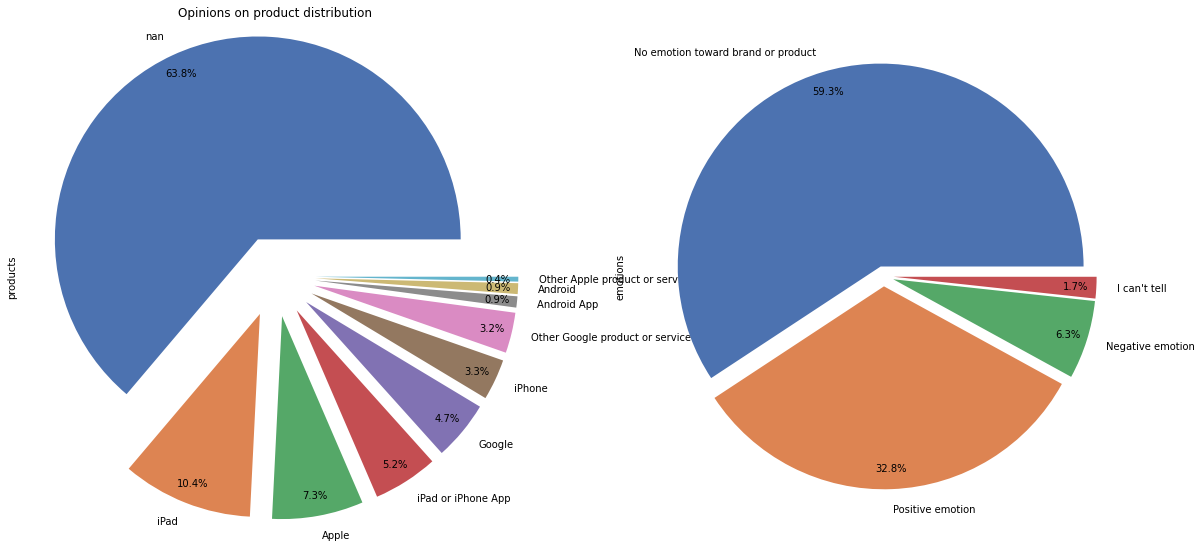

In [68]:
products= df['products'].value_counts(dropna=False)
emotions=df['emotions'].value_counts(dropna=False)

distance = [0.2 for i in products]
labels = ['' for i in products]
colors = sns.color_palette('deep')

fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,2,1)
ax = products.plot.pie(autopct='%1.1f%%', colors=colors, explode=distance, grid=False, pctdistance=0.90)
ax.set_title('Opinions on product distribution')

fig.add_subplot(1,2,2)
ax3 = df.emotions.value_counts(dropna=False)
distanceEmotions = [0.05 for i in ax3]
ax3.plot.pie(autopct='%1.1f%%', colors=colors, explode=distanceEmotions, grid=False, pctdistance=0.90)

As we can see, there is lots of unassigned data, in both emotions and product columns. Because of that we have unbalanced data – meaning there is an overwelimg ammount of one fature in dataset. 
If we would try to train neural network on unbalanced data, we would overfit network to classify most of the currences to dominant feature.
 
What can we do to prevent such thing? We can balance our data set. Basicaly we try to match size of smallest feature in our data set. In case of 'Emotions' column that would mean to fit size of 'Positive emotion' to size of 'Negative emotion'. Quick math: 6.3% of 9093 is 572, that means that we should only use 572 of examples from 'Positive Emotions' (we don't want to use 'No Emotions' because this won't help us with deteminating if tweet is possitive or negative).

In [84]:
throw_away = df.loc[df.emotions.isin(["No emotion toward brand or product","I can't tell"])].index
df.drop(throw_away, inplace=True)

possitive_emotions = df.emotions.loc[df.emotions == "Positive emotion"].index
df.sample(frac=1 - 0.5)

tweet_text    1774
products      1577
emotions      1774
dtype: int64

<AxesSubplot:ylabel='emotions'>

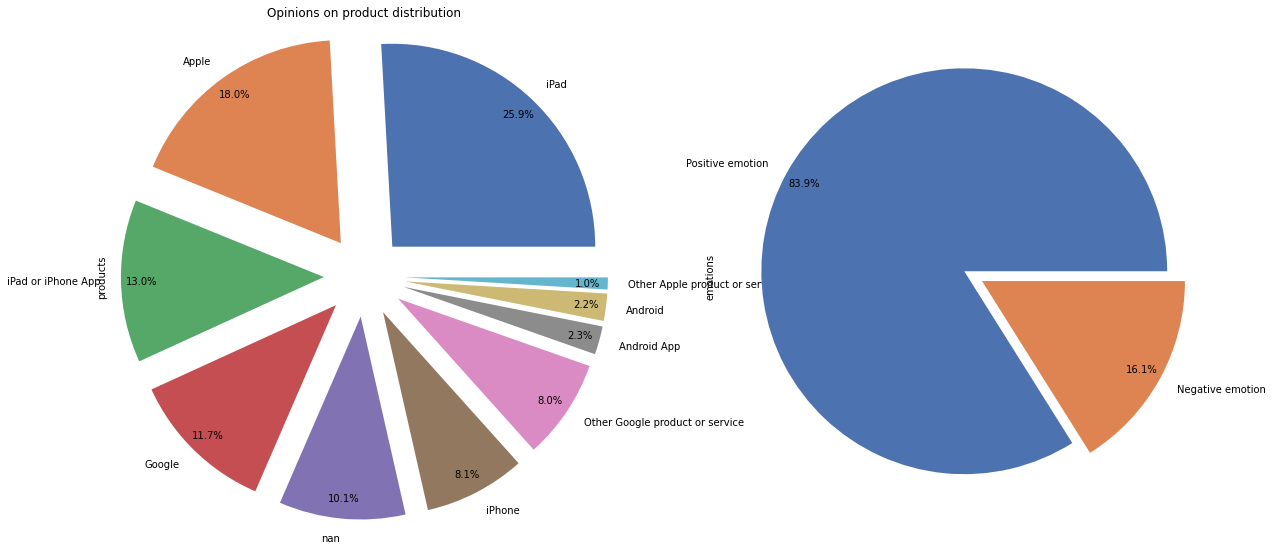

In [70]:
products= df['products'].value_counts(dropna=False)
emotions=df['emotions'].value_counts(dropna=False)

distance = [0.2 for i in products]
labels = ['' for i in products]
colors = sns.color_palette('deep')

fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,2,1)
ax = products.plot.pie(autopct='%1.1f%%', colors=colors, explode=distance, grid=False, pctdistance=0.90)
ax.set_title('Opinions on product distribution')

fig.add_subplot(1,2,2)
ax3 = df.emotions.value_counts(dropna=False)
distanceEmotions = [0.05 for i in ax3]
ax3.plot.pie(autopct='%1.1f%%', colors=colors, explode=distanceEmotions, grid=False, pctdistance=0.90)

## Text normalization

In [71]:
df.tweet_text = df.tweet_text.astype(str)

In [72]:
df.tweet_text = df.tweet_text.apply(lambda x: x.lower())

In [73]:
def cleanseText(textColumn):
    textColumn = textColumn.apply(lambda x: re.sub("@\w+","",x))
    textColumn = textColumn.apply(lambda x: x.lower())
    textColumn = textColumn.apply(lambda x: re.sub(r'\d+','',x))
    textColumn = textColumn.apply(lambda x: re.sub(r'{link}','',x))
    textColumn = textColumn.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    textColumn = textColumn.apply(lambda x: x.strip())

    return textColumn

def test(x):
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(x)
    tokenized = [i for i in tokens if not i in stop_words]
    return tokenized

In [74]:
def Tokenization(textColumn):
    print("hello")
    textColumn = textColumn.apply(lambda x: test(x))

In [75]:
df.tweet_text = cleanseText(df.tweet_text)
# df.tweet_text = Tokenization(df.tweet_text)

In [76]:
print(df.tweet_text[0])

i have a g iphone after  hrs tweeting at riseaustin it was dead  i need to upgrade plugin stations at sxsw
